# Florence Nightingale's Polar Plot

DS 2023 | Communicating with Data

An example of the rhetorical use of data.

# Overview

> DIAGRAMS are of great utility for illustrating certain questions of vital statistics by conveying ideas on the subject through the eye, which cannot be so readily grasped when contained in figures. This aid has therefore been called in to give greater clearness to the numerical results in the body Report and in the Appendix.\
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&mdash; Florence Nightingale, 1858, _Mortality of the British Army_, p, 1. [Source](https://www.google.com/books/edition/Mortality_of_the_British_Army/u9VLAAAAYAAJ?hl=en&gbpv=1)

> The main end of Statistics should not be to inform the Government as to how many men have died, but to enable immediate steps to be taken to prevent the extenuation of disease and mortality.\
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&mdash; Florence Nightingale, 1858, _Notes on Matters Affecting the Health, Efficiency, and Hospital Administration of the British Army_, p. 329. [Source](https://archive.org/details/b20387118/page/n7/mode/2up)

> Full and minute statistical details are to the lawgiver, as the chart, the compass, and the lead to the navigator.\
<br/>&nbsp;&nbsp;&nbsp;&nbsp;&mdash; Lord Brougham, 1856, _Judicial Statistics_ [Source](https://api.parliament.uk/historic-hansard/lords/1856/mar/03/judicial-statistics).

<!-- > All the pleasures prove\
That facts and figures can supply\
Unto the Statist's ravished eye.\
&mdash; 1885, "The Passionate Statistician to His Love," *Punch*. -->

This notebook recreates the Florence Nightingale's famous polar plot of British deaths during the Crimean War. In doing so, it attempts to follow the process that led to the final product.

For a good background to the story behind this visualization, see [Diagrammatic War, 1858](https://www.the-scientist.com/diagrammatic-war-1858-70702) in _Science_, and [How Florence Nightingale Changed Data Visualization Forever](https://www.scientificamerican.com/article/how-florence-nightingale-changed-data-visualization-forever/) in _Scientific American_.

## The First Version

This is Nightingale's first attempt to visualize data relating to the disease and mortality of British soldiers during the Crimean War: 

<img src="batwing.jpg" width=600>

This version of the visualization is known as a "bat's wing" diagram. It compares the causes of English soldiers’ deaths during the Crimean War from April 1854 to March 1855 by month (right) with deaths from April 1855 to March 1856 (left). 

The diagram uses **color** shading to signify **cause of death**:

- The <span style="color:green;font-weight:bold;">green</span> shaded area on the right represents **preventable deaths** due to disease
- The <span style="color:red;font-weight:bold;">red</span> area stands for deaths caused by **wounds**.
- The <span style="color:gray;font-weight:bold;">gray</span> area stands for deaths from all **other causes**. 

The diagram use **length** of each radial line to signify death rate, i.e. length is proportional to the death rate for that month. Notice the big spike in deaths in January 1855.

Note, however, that **both the text and the appearance imply that it is the shaded area that is proportional to the death rate**, rather than the length of the radial lines. 

This is misleading, because the **area increases disproportionately to the radius**.

Florence recognised this error and replaced the bat wing diagram in later documents.

## The Principle of Proportional Ink

In modern terms, Nightingale's first draft violates the principle of **proportional ink**.

The concept of proportional ink is simply that areas of shapes, e.g. shaded wedges, in a visualization must be proportional to the data values they represent. 

Since areas are quantifiable, we can enforce the principle fairly easily. 

## The Revised Version

This is Nightingale's revised version:

<img src="the-viz.png" width="800">

<div style="font-size:90%;">
Nightingale, Florence. 1858. *Notes on Matters Affecting the Health, Efficiency, and Hospital Administration of the British Army: Founded Chiefly on the Experience of the Late War*. London: printed by Harrison. <a href="http://archive.org/details/b20387118">http://archive.org/details/b20387118</a>. Page 310&ndash;11.
</div>

Below is the annotation in lower-left, transcribed and slightly modified for readability. _This text tells the reader how to interpret that graphic_. Note how she goes to to great lengths to explain the principle by which the magnitudes in the data map onto the areas and colors of the chart:

- The areas of the blue, red, and black wedges are each **measured from the centre as the common vertex**.

  - The **blue wedges** measured from the centre of the circle represent area for area the deaths from Preventable or Mitigable Zymotic diseases.
  - The **red wedges** measured from the centre the deaths from wounds.
  - The **black wedges** measured from the centre the deaths from all other causes.

- The **black line across the red triangle** in November 1854 marks the boundary of the deaths from all other causes during the month.

- In October 1854 and April 1855, the black area coincides with the red, in January & February 1856, the blue coincides with the black.

- The entire areas may be compared by following the blue, the red, and the black lines enclosing them.

# A Reproduced Version

Let's try to reproduce the second version to see exactly how the magnitudes in the data map onto the wedge areas of the chart. For although we see that she corrects the problem, it is not clear **how** she corrected it.

To do this, we will take the data she used to create visualization and use Plotly's polar graph function to create the plot.



## Get the Data

The data on which the graphic is based are found in two sources. Here we show a scanned image of the page from one source:

<!--
<img src="the-data.png" width="800">

> Nightingale, Florence. 1858. *Mortality of the British Army: At Home and Abroad, and during the Russian War, as Compared with the Mortality of the Civil Population in England; Illustrated by Tables and Diagrams*. London. http://hdl.handle.net/2027/njp.32101075698199.
-->
<img src="the-data2.png" width="800">

> Nightingale, Florence. 1858. *Notes on Matters Affecting the Health, Efficiency, and Hospital Administration of the British Army: Founded Chiefly on the Experience of the Late War*. London: printed by Harrison. http://archive.org/details/b20387118. Page 315.

Below is a transcription of these data into a CSV string. 

Note we can use the information in the image above as a data dictionary.

In [1]:
data_str = """YEAR,MONTH,STRENGTH,DISEASE,INJURY,OTHER,DISEASE_RATE,INJURY_RATE,OTHER_RATE
1854, 4, 8571, 1, 0, 5, 1.4, 0.0, 7.0
1854, 5, 23333, 12, 0,9, 6.2, 0.0, 4.6
1854, 6, 28333, 11, 0, 6, 4.7, 0.0, 2.5
1854, 7, 28722, 359, 0, 23, 150.0, 0.0, 9.6
1854, 8, 30246, 828, 1, 30, 328.5, 0.4, 11.9
1854, 9, 30290, 788, 81, 70, 312.2, 32.1, 27.7
1854, 10, 30643, 503, 132, 128, 197.0, 51.7, 50.1
1854, 11, 29736, 844, 287, 106, 340.6, 115.8, 42.8
1854, 12, 32779, 1725, 114, 131, 631.5, 41.7, 48.0
1855, 1, 32393, 2761, 83, 324, 1022.8, 30.7, 120.0
1855, 2, 30919, 2120, 42, 361, 822.8, 16.3, 140.1
1855, 3, 30107, 1205, 32, 172, 480.3, 12.8, 68.6
1855, 4, 32252, 477, 48, 57, 177.5, 17.9, 21.2
1855, 5, 35473, 508, 49, 37, 171.8, 16.6, 12.5
1855, 6, 38863, 802, 209, 31, 247.6, 64.5, 9.6
1855, 7, 42647, 382, 134, 33, 107.5, 37.7, 9.3
1855, 8, 44614, 483, 164, 25, 129.9, 44.1, 6.7
1855, 9, 47751, 189, 276, 20, 47.5, 69.4, 5.0
1855, 10, 46852, 128, 53, 18, 32.8, 13.6, 4.6
1855, 11, 37853, 178, 33, 32, 56.4, 10.5, 10.1
1855, 12, 43217, 91, 18, 28, 25.3, 5.0, 7.8
1856, 1, 44212, 42, 2, 48, 11.4, .5, 13.0
1856, 2, 43485, 24, 0, 19, 6.6, 0.0, 5.2
1856, 3, 46140, 15, 0, 35, 3.9, 0.0, 9.1"""

We begin by importing our libraries.

In [2]:
# For data 
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For various things 
import io # Reading a string as a file
# import re # Regular expressions
import math # To get the value of pi

Next, we convert our string data into a dataframe.

In [3]:
df = pd.read_csv(io. StringIO(data_str))
df = df.reset_index(drop=True).set_index(['YEAR','MONTH'])

We verify that Pandas created the correct data types for our features.

In [4]:
df.dtypes

STRENGTH          int64
DISEASE           int64
INJURY            int64
OTHER             int64
DISEASE_RATE    float64
INJURY_RATE     float64
OTHER_RATE      float64
dtype: object

## Reshape the Data

Now we reshape our data into suitable form.

- We only need the rates; she has already done the work for us.
- We want the the table in narrow form to make it easier to compute the radius.

In [5]:
RATES = df[['DISEASE_RATE','INJURY_RATE','OTHER_RATE']].copy()
RATES.columns = ['D','I','O']
RATES = RATES.stack().to_frame('rate')
RATES.index.names = ['YEAR','MONTH','CAUSE']

In [6]:
RATES

rate
YEAR MONTH CAUSE      
1854 4     D       1.4
           I       0.0
           O       7.0
     5     D       6.2
           I       0.0
...                ...
1856 2     I       0.0
           O       5.2
     3     D       3.9
           I       0.0
           O       9.1

[72 rows x 1 columns]

## Map Rate to Radius

The problem with Nightingale's original plot is that the area of a sector of a circle is not linearly proportional to it the radius.

Since the area of a circle sector increases as a square of the radius, just using the radius exaggerates differences between values.

To overcome this problem, we need to map the data values onto the area of the circle, and then compute the radius using the following formula:

<img src="circle.png" width="250">

$\Large r = \sqrt{\dfrac{A}{(\theta/2)}}$

<!-- $B = \theta/2$
$r = \sqrt{\dfrac{A}{B}}$ -->

Given this equation, we can map the number of deaths to $A$ and then compute the appropriate $r$ to use in our plot.

Here we define a function to do this, and then apply it to our data frame.

In [7]:
def get_radius(A, slices=12, factor=1):
    B = (360 / slices) / 2
    r = (math.sqrt(A/B)) * factor
    return r

We then apply this formula to the three causes.

In [8]:
RATES['radius'] = RATES['rate'].apply(get_radius)

Finally, we create a wide table representation of the radius data.

In [9]:
RADIUS = RATES.radius.unstack()
RADIUS.head()

CAUSE              D         I         O
YEAR MONTH                              
1854 4      0.305505  0.000000  0.683130
     5      0.642910  0.000000  0.553775
     6      0.559762  0.000000  0.408248
     7      3.162278  0.000000  0.800000
     8      4.679744  0.163299  0.890693

## Visualize the Result

Before visualizing, we organize the data we will need to make our plot.

Since we are going to plot **dates** along the **angular axis** (which replaces the x-axis) and **causes** along the **radial axis** (which replaces the y-axis), we create a `DATE` and a `CAUSE` table.

In [10]:
DATE = pd.DataFrame(index=RADIUS.index)
DATE['seq_num'] = [i for i in range(12)] * 2
DATE['angle'] = 2 * np.pi * DATE.seq_num / 12 
DATE.head()

seq_num     angle
YEAR MONTH                   
1854 4            0  0.000000
     5            1  0.523599
     6            2  1.047198
     7            3  1.570796
     8            4  2.094395

We create a string representation of months for labeling.

In [11]:
month_names = "JAN FEB MAR APR MAY JUN JUL AUG SEP OCT NOV DEC".split()
DATE['label'] = DATE.apply(lambda x: f"{month_names[x.name[1]-1]} {x.name[0]}", axis=1)
DATE.head()

seq_num     angle     label
YEAR MONTH                             
1854 4            0  0.000000  APR 1854
     5            1  0.523599  MAY 1854
     6            2  1.047198  JUN 1854
     7            3  1.570796  JUL 1854
     8            4  2.094395  AUG 1854

In [12]:
CAUSE = pd.DataFrame(index=RADIUS.columns)
CAUSE['color'] = ['lightblue','pink','gray']
CAUSE['name'] = ['disease', 'injury', 'other']
CAUSE['order'] = [2, 0, 1] # The order in which the original wedges appear to be drawn
CAUSE['description'] = ['Zymotic diseases', 'Wounds and injuries', 'All other causes']
CAUSE

,color,name,order,description
CAUSE,,,,
D,lightblue,disease,2,Zymotic diseases
I,pink,injury,0,Wounds and injuries
O,gray,other,1,All other causes


Now we create a function to generate a polar plot from our data using Matplotlib.

In [13]:
def polarplot(offset=0):
    """
    The function takes the RADIUS data frame and plots a 12 month segment from it a
    as a polar plot.
    offset: the beginning month number; only two options in this case, 0 and 12.
    mode: The mode of arranging wedge segments for each month.
          options: 'overlay' or 'stacked'
          default: 'overlay'
    """

    # Only want 12 values, since each plot will represent a year of data
    X = RADIUS.iloc[offset:offset+12]

    # We create a largish figure to work with
    plt.figure(figsize=(10, 10))

    # We create an axes object using polar coordinates
    ax = plt.subplot(projection='polar')

    # Next, we will iterate through our data and build our
    # wedges one by one

    # Before doing this, we set some parameters for our wedges

    # We set each wedge to 1/12 of a circle in radians
    width = (2 * np.pi) / 12

    # Where the wedge begins on the radial axis
    bottom = 0 

    # We go through the rows, grabbing the date
    for date, row in X.iterrows():

        # Where the wedge begins on the angular axis
        angle = DATE.loc[date, 'angle'] 

        # For each date, we loop through the causes
        # We sort the radius values in each case so that all wedges are visible
        for cause in row.sort_values(ascending=False).index:
            height = row.loc[cause] # radius
            color = CAUSE.loc[cause, 'color']
            ax.bar(angle, height, width=width, bottom=bottom, 
                color=color, edgecolor='lightgray', linewidth=1)
        
    # We orient the plot to match the original
    ax.set_theta_direction(-1) # Counter-clockwise
    ax.set_theta_offset(np.pi + (-15 * np.pi / 180))  # Rotate to align with the original

    # We remove lines and labels
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    plt.show()

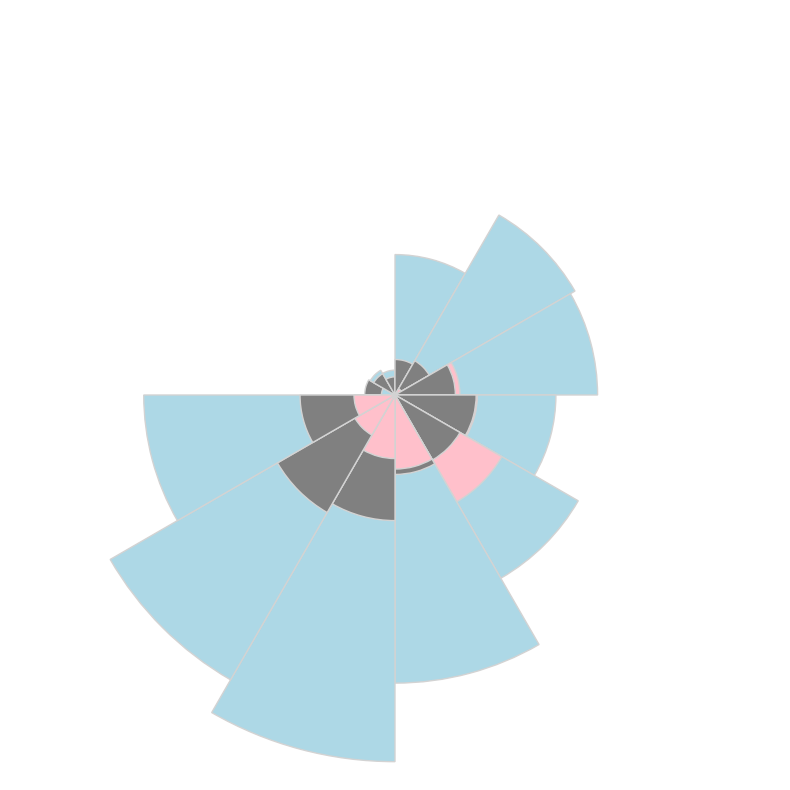

In [14]:
polarplot()

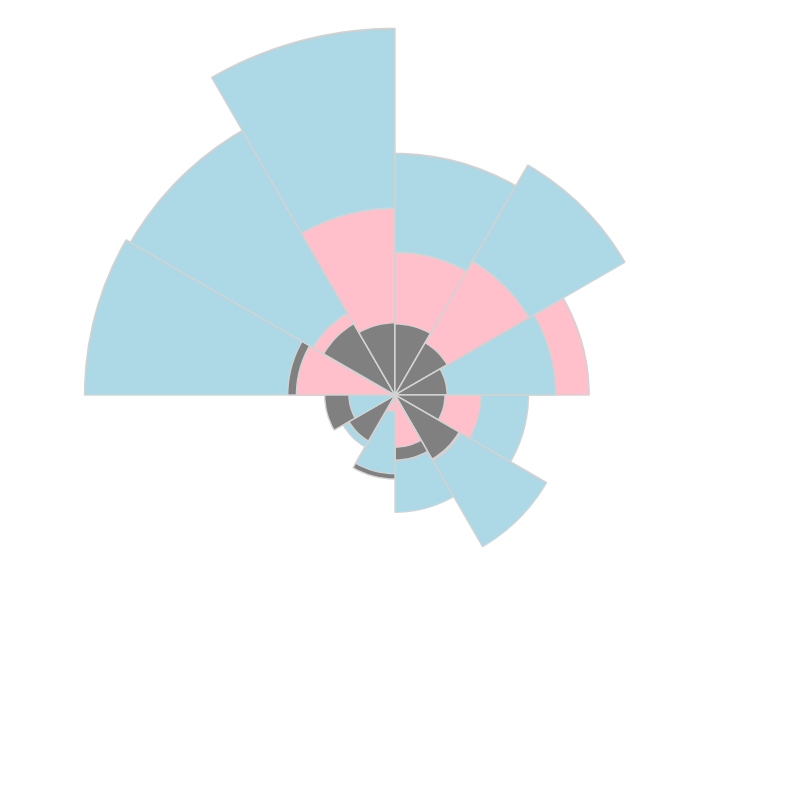

In [15]:
polarplot(offset=12)

<img src="the-viz.png" width="800">

# Notes and Queries

- Missing is the black line that separates the gray and pink wedges from the blue.
- Why not simply show a pie or bar chart of aggregate statistics?
- Why are there geographic names on the diagram? (Crimea and Bulgaria are at 0&deg; and 90&deg; respectively.)

# Next

Take the plots we just created in use a tool like Google Slides to recreate the original image.

# Other Visualizations

In [16]:
RW = RATES.rate.unstack()[cause_order].join(DATE.label).reset_index(drop=True).set_index('label')
RW.columns = CAUSE.loc[RW.columns, 'name']
RW.columns.name = 'cause'
RW.index.name = 'date'
# RW.head()

NameError: name 'cause_order' is not defined

In [ ]:
RW.style.format("{:.02f}").background_gradient(axis=None, cmap='Reds')

In [ ]:
plt.figure(figsize=(10,1))
sns.heatmap(RW.T, cmap="Reds", cbar=None)
plt.show()

In [ ]:
color = CAUSE.loc[cause_order].color

In [ ]:
ax = RW.plot.bar(stacked=True, rot=45, figsize=(10,5), color=color)

# Insert line for when Nightingale arrives
label_y = 1100
date1_idx = RW.index.get_loc('NOV 1854')
ax.axvline(date1_idx, ls='dotted')
ax.annotate("Nightingale arrives", xy=(date1_idx, label_y), xytext=(date1_idx - .5, label_y), ha='right')

# Insert line for when the Sanitary Commission is instituted
date2_idx = RW.index.get_loc('MAR 1855')
ax.axvline(date2_idx, ls='dotted')
ax.annotate("Sanitary Commission", xy=(date2_idx, label_y), xytext=(date2_idx + .5, label_y), ha='left')

ax.set_ylabel("deaths per 1000")
plt.title("Causes of Deaths between April 1854 and March 1856", y=1.05)
ax.legend(frameon=False)
sns.despine()
plt.show()

In [ ]:
ax = RW.plot.line(figsize=(10,5), rot=45, color=color, style=".-")
ax.set_ylabel("deaths per 1000")
plt.title("Causes of Deaths between April 1854 and March 1856", y=1.05)
sns.despine()
plt.show()

In [ ]:
ax = RW.plot.area(figsize=(10,5), rot=45, color=color, stacked=False)
ax.set_ylabel("deaths per 1000")
plt.title("Causes of Deaths between April 1854 and March 1856", y=1.05)
sns.despine()
plt.show()

In [ ]:
ax = RW.plot.area(figsize=(10,5), rot=45, color=color, stacked=True)
ax.set_ylabel("deaths per 1000")
plt.title("Causes of Deaths between April 1854 and March 1856", y=1.05)
sns.despine()
plt.show()

In [ ]:
RW.mean().plot.pie(colors=color)
plt.title("Mean Causes of Deaths between April 1854 and March 1856", y=1.05)
plt.show()

In [ ]:
ax = RW.mean().plot.bar(rot=0, color=color)
ax.set_xlabel('')
ax.set_ylabel("Mean deaths per 1000")
plt.title("Causes of Deaths between April 1854 and March 1856", y=1.05)
sns.despine()
plt.show()

# EXTRA

## Using Plotly

In [ ]:
RADIUS.join(DATE.label).head()

In [ ]:
PLOTLY = RADIUS.join(DATE).reset_index().set_index('label')[['D','O','I']]
PLOTLY.columns.name = 'CAUSE'
PLOTLY.index.name = 'date'
PLOTLY.head()

In [ ]:
cause_order = CAUSE.sort_values('order').index # ['I','O','D']
PLOTLY = PLOTLY[cause_order]
PLOTLY.head()

We divide our date into twelve month segments to match the two plots in the original.

Then we reshape as long, the way Plotly wants it.

In [ ]:
Y1 = PLOTLY.iloc[:12,:].stack().to_frame('radius').reset_index() 
Y2 = PLOTLY.iloc[12:,:].stack().to_frame('radius').reset_index()

In [ ]:
Y1.head()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def polarplotly(year_df, title, mode='overlay'):

    fig = px.bar_polar(
        year_df,
        r='radius',
        labels='CAUSE',
        color='CAUSE',
        theta = 'date',
        barmode=mode,  
        color_discrete_sequence=CAUSE.loc[cause_order].color.values,
        start_angle=165,
        height=1000,
        width=1000,
        title=title
    )

    fig.update_layout(
            polar=dict(
                radialaxis=dict(
                    showgrid=False,
                    showline=False,
                    showticklabels=False  # Remove the radial numbers
                ),
                angularaxis=dict(
                    showgrid=False,
                    showline=False,
                    showticklabels=False  # Remove the dates around the edge
                ),
                bgcolor='rgba(0,0,0,0)',
                bargap=0  # Remove gaps between wedges
            ),
            paper_bgcolor='white',
            plot_bgcolor='white',
    )

    fig.show()

In [ ]:
polarplotly(Y1, "Year 1")

In [ ]:
polarplotly(Y2, "Year 2")